In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os 

In [2]:
sys.path.insert(0,'../scripts/')
from images_generator import image_generator_sim, image_generator_real
from images_utils import get_data, shift_gal, peak_detection, draw_images
import cosmos_params
import plot

***
**Note:**

Images simulated in this notebook are drawn supposing a number of exposures corresponding to the **full LSST and Euclid surveys**. There is just one PSF applied on the stack.

If you want to generate images for one single exposure, go to the file `cosmos_param.py` and change the `full_or_single` parameter to `'single'`.

***

# Image generation using parametric models (i.e. simulations)

## Generate image of isolated galaxies with brightest centered

In [3]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'simulation' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'isolated' #isolated blended
method_shift = 'noshift' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 1 # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 27.5 # magnitude cut
max_stamp_size = 64 # Size of patch to generate
center_brightest = True # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 3.2 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 2. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r


In [4]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
cosmos_cat_dir = '/sps/lsst/users/barcelin/COSMOS_25.2_training_sample'

In [5]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [6]:
res[2]

{'redshift_0': 0.7653999924659729,
 'moment_sigma_0': 1.96931791305542,
 'e1_0': -0.2602686882019043,
 'e2_0': -0.223618745803833,
 'mag_0': 25.928131480411846,
 'nb_blended_gal': 1,
 'mag': 25.928131480411846,
 'mag_ir': -3.0137893881874946,
 'closest_mag': nan,
 'closest_mag_ir': nan,
 'closest_x': nan,
 'closest_y': nan,
 'idx_closest_to_peak': 0,
 'n_peak_detected': 1,
 'SNR': 82.48885605978316,
 'SNR_peak': 0.0955151901492128}

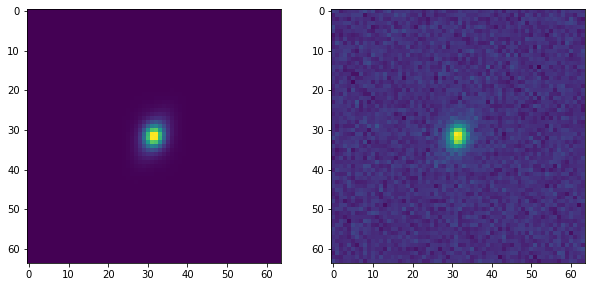

In [7]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6])

## Generate image of blended galaxies without brightest centered

In [8]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'simulation' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'blended' #isolated blended
method_shift = 'uniform' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 6 # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 27.5 # magnitude cut
max_stamp_size = 64 # Size of patch to generate
center_brightest = True # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 3.2 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 2. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r


In [9]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
cosmos_cat_dir = '/sps/lsst/users/barcelin/COSMOS_25.2_training_sample'

In [10]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest)

In [11]:
res[2]

{'redshift_0': 0.6600000262260437,
 'moment_sigma_0': 3.883007287979126,
 'e1_0': -0.03655092418193817,
 'e2_0': -0.0797087699174881,
 'mag_0': 23.991748060969257,
 'redshift_1': 1.9926999807357788,
 'moment_sigma_1': 1.8701282739639282,
 'e1_1': -0.2644849419593811,
 'e2_1': 0.08138754963874817,
 'mag_1': 26.235291291541053,
 'redshift_2': 0.18870000541210175,
 'moment_sigma_2': 1.9936552047729492,
 'e1_2': 0.06117476895451546,
 'e2_2': -0.26671043038368225,
 'mag_2': 27.347242070720178,
 'redshift_3': 1.3839999437332153,
 'moment_sigma_3': 1.8966866731643677,
 'e1_3': 0.36402082443237305,
 'e2_3': 0.06033749505877495,
 'mag_3': 27.254099879409257,
 'redshift_4': 2.78410005569458,
 'moment_sigma_4': 1.6774317026138306,
 'e1_4': 0.26512590050697327,
 'e2_4': 0.1170271635055542,
 'mag_4': 27.0166192367684,
 'redshift_5': 0.9153000116348267,
 'moment_sigma_5': 2.1296942234039307,
 'e1_5': 0.05712762475013733,
 'e2_5': -0.3711046874523163,
 'mag_5': 26.04774974504185,
 'nb_blended_gal': 6

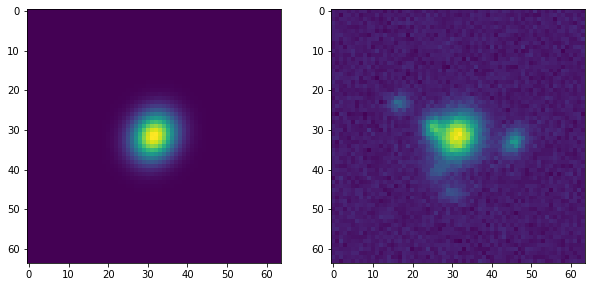

In [12]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6])

Now if I want an image with a variable number of galaxies, say between 2 and 5, I need to set the `nmax_blend` parameter to (2,5).

In [16]:
nmax_blend = (2,5) # Give an interval to sample the number of galaxies to add in this interval

In [17]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest)

In [18]:
res[2]

{'redshift_0': 0.7389000058174133,
 'moment_sigma_0': 1.9080324172973633,
 'e1_0': 0.15805380046367645,
 'e2_0': 0.08356016874313354,
 'mag_0': 26.964947847009398,
 'redshift_1': 1.2417999505996704,
 'moment_sigma_1': 3.0438122749328613,
 'e1_1': -0.1528998613357544,
 'e2_1': -0.171500563621521,
 'mag_1': 26.755079197383793,
 'redshift_2': 0.5952000021934509,
 'moment_sigma_2': 3.1278834342956543,
 'e1_2': 0.010181998834013939,
 'e2_2': -0.07253529131412506,
 'mag_2': 23.67878929834871,
 'redshift_3': 0.7074000239372253,
 'moment_sigma_3': 2.089099884033203,
 'e1_3': 0.14781245589256287,
 'e2_3': -0.6162664890289307,
 'mag_3': 27.498005092949374,
 'redshift_4': 10.0,
 'moment_sigma_4': 10.0,
 'e1_4': 10.0,
 'e2_4': 10.0,
 'mag_4': 10.0,
 'nb_blended_gal': 4,
 'mag': 23.67878929834871,
 'mag_ir': -3.6582089045599826,
 'closest_mag': 26.964947847009398,
 'closest_mag_ir': -0.6914840315378412,
 'closest_x': -2.3986790565803418,
 'closest_y': 0.02308439478316071,
 'idx_closest_to_peak': 0,

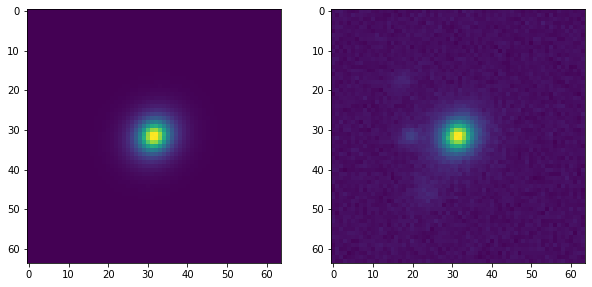

In [19]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6])

# Image generation using real galaxy images (brightest not centered)

A small correlated noise is observed on these 'denoised' real images. 
A procedure exists in GalSim to whiten the noise but is still not functionning yet. An issue is opened about this: https://github.com/GalSim-developers/GalSim/issues/1071


Important: If the parameter `center_brightest` is set to `False`, the brightest galaxy is not centered any more but also the first parameters at rank 0 in the data do not refer to the brightest galaxy any more. It is the case when `center_brightest` is set to `True`.

## Generate image of isolated galaxies

In [13]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'real' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'isolated' #isolated blended
method_shift = 'noshift' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 1 # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 26. # magnitude cut
max_stamp_size = 64 # Size of patch to generate
center_brightest = False # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 3.2 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 2. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r

In [14]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
cosmos_cat_dir = '/sps/lsst/users/barcelin/COSMOS_25.2_training_sample'

In [15]:
res = image_generator_real(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [16]:
res[2]

{'mag_0': 23.36670574152965,
 'redshift_0': 0.0,
 'moment_sigma_0': 2.6421353816986084,
 'e1_0': 0.2761915624141693,
 'e2_0': -0.6973720788955688,
 'nb_blended_gal': 1,
 'mag': 23.36670574152965,
 'mag_ir': -4.312175804753392,
 'closest_mag': nan,
 'closest_mag_ir': nan,
 'closest_x': nan,
 'closest_y': nan,
 'idx_closest_to_peak': 0,
 'n_peak_detected': 1,
 'SNR': 496.3025826862239,
 'SNR_peak': 0.4690600080028283}

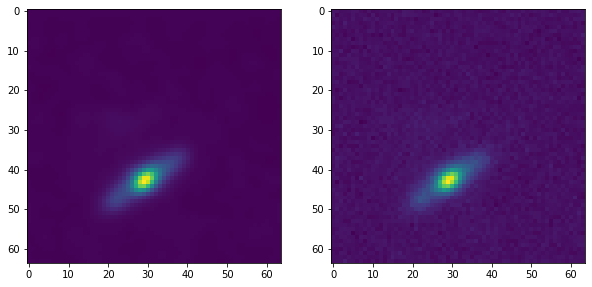

In [17]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6])

## Generate image of blended galaxies

In [18]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'real' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'blended' #isolated blended
method_shift = 'uniform' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 6 # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 26 # magnitude cut
max_stamp_size = 64 # Size of patch to generate
center_brightest = True # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'annulus'
max_dx = 3.2 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 4. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r


In [19]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
cosmos_cat_dir = '/sps/lsst/users/barcelin/COSMOS_25.2_training_sample'

In [20]:
res = image_generator_real(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [21]:
res[2]

{'mag_0': 25.389589773614233,
 'redshift_0': 0.0,
 'moment_sigma_0': 3.1996872425079346,
 'e1_0': -0.157423734664917,
 'e2_0': 0.04142890125513077,
 'mag_1': 25.016921898122824,
 'redshift_1': 0.0,
 'moment_sigma_1': 2.12668514251709,
 'e1_1': -0.13553614914417267,
 'e2_1': -0.29607388377189636,
 'mag_2': 23.88938824443931,
 'redshift_2': 0.0,
 'moment_sigma_2': 2.6921164989471436,
 'e1_2': 0.7084723114967346,
 'e2_2': -0.3575482964515686,
 'mag_3': 25.953836604355587,
 'redshift_3': 0.0,
 'moment_sigma_3': 2.4311718940734863,
 'e1_3': 0.23491394519805908,
 'e2_3': 0.4101317524909973,
 'mag_4': 23.538027489112224,
 'redshift_4': 0.0,
 'moment_sigma_4': 2.1240813732147217,
 'e1_4': -0.004766765981912613,
 'e2_4': 0.21644116938114166,
 'mag_5': 24.771444425282816,
 'redshift_5': 0.0,
 'moment_sigma_5': 2.807162046432495,
 'e1_5': -0.22634266316890717,
 'e2_5': 0.37414637207984924,
 'nb_blended_gal': 6,
 'mag': 23.538027489112224,
 'mag_ir': -3.785120455536873,
 'closest_mag': 25.01692189

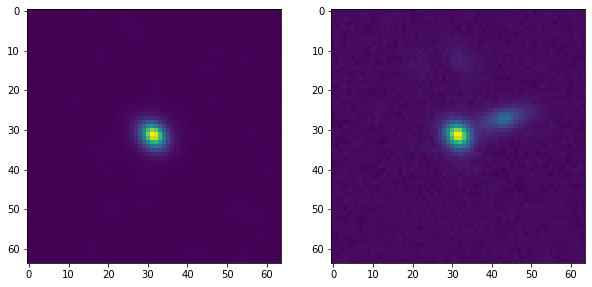

In [22]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6])

# Image generation of field

 51.2 arcseconds of LSST (256x256 pixels, 256 x 0.2 = 51.2 - 0.2 arcsecond/pix is pixel size of LSST data), so shift in 51.2/2 = 25,6 arcseconds.
 
 On these field I add a random number between 32 and 96 galaxies so that, if we generate a lot of these, the mean is at 64 galaxies per patch (mean of galaxies density after 10 years of operation for LSST, https://arxiv.org/pdf/1911.02505.pdf, part 2.4 page 4)

In [23]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'simulation' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'blended' #isolated blended
method_shift = 'uniform' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = (32,96) # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 27.5 # magnitude cut
max_stamp_size = 256 # Size of patch to generate
center_brightest = False # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 25.6 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 4. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r

In [24]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
cosmos_cat_dir = '/sps/lsst/users/barcelin/COSMOS_25.2_training_sample'

## With simulations

In [25]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [26]:
res[2]

{'redshift_0': 0.6212000250816345,
 'moment_sigma_0': 1.8274333477020264,
 'e1_0': 0.18251654505729675,
 'e2_0': -0.09732812643051147,
 'mag_0': 26.251367282692932,
 'redshift_1': 0.9679999947547913,
 'moment_sigma_1': 1.8258107900619507,
 'e1_1': 0.14016395807266235,
 'e2_1': -0.3732438385486603,
 'mag_1': 27.483668844770396,
 'redshift_2': 0.5946000218391418,
 'moment_sigma_2': 1.6632441282272339,
 'e1_2': -0.39993536472320557,
 'e2_2': 0.20824161171913147,
 'mag_2': 26.6718842802273,
 'redshift_3': 0.605400025844574,
 'moment_sigma_3': 1.732264757156372,
 'e1_3': -0.2280246615409851,
 'e2_3': -0.47906047105789185,
 'mag_3': 26.822883959165814,
 'redshift_4': 1.1464999914169312,
 'moment_sigma_4': 2.8547263145446777,
 'e1_4': 0.1880025416612625,
 'e2_4': 0.033716510981321335,
 'mag_4': 25.694853984550075,
 'redshift_5': 0.7128000259399414,
 'moment_sigma_5': 2.1414780616760254,
 'e1_5': 0.06287111341953278,
 'e2_5': 0.02412460744380951,
 'mag_5': 25.112285771194845,
 'redshift_6': 0.

In [27]:
print(str(res[2]['nb_blended_gal'])+' galaxies are added to this image.')

59 galaxies are added to this image.


Here `res[0]` is not very interesting to plot. It is just the first galaxy which was generated, not necessarily the brightest one, as we set the parameter `center_brightest` to `False`.

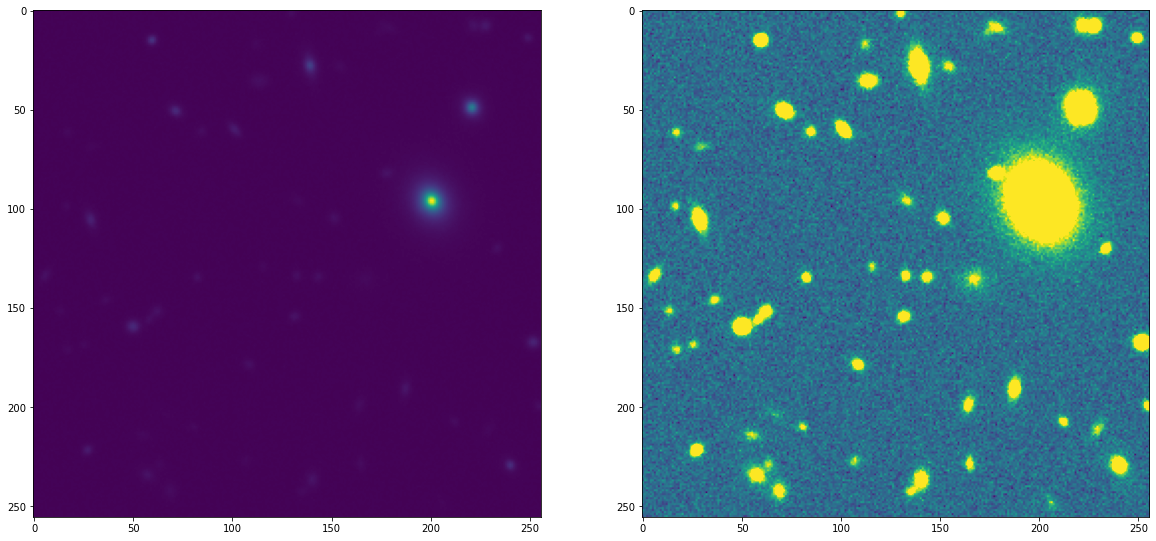

In [28]:
fig, ax = plt.subplots(1,2, figsize =(20,10))
ax[0].imshow(res[1][6])
ax[1].imshow(res[1][6], vmax = 2000)

Use the `plot_rgb` function of the `plot.py` module to show the image in RGB (IRG bands)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


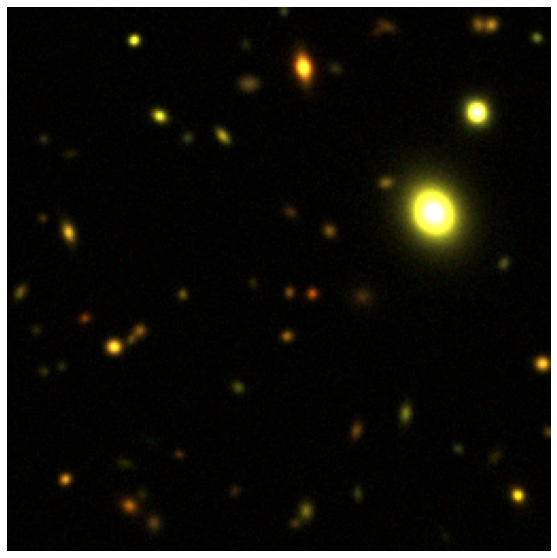

In [29]:
bands = [7,6,5] # Plot ugrizy

fig = plt.figure(figsize = (10,10))

plot.plot_rgb(res[1]/(np.max(res[1][4:])/10), bands = bands,ax= None, band_first = True,zoom = 1, clip = False)

Put a cross on the center of each galaxy with the shift information generated when the image is created.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


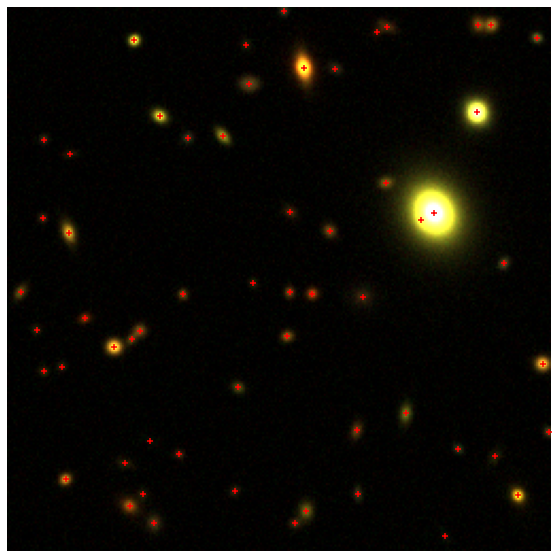

In [30]:
bands = [7,6,5] # Plot ugrizy
pixel_scale_lsst = 0.2 # arcsec/pix
fig = plt.figure(figsize = (10,10))

plot.plot_rgb(res[1]/(np.max(res[1][4:])/10), bands = bands,ax= None, band_first = True,zoom = 1, shifts = res[3]/pixel_scale_lsst, clip = False)

## With real images

In [35]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'real' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'blended' #isolated blended
method_shift = 'uniform' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = (32,96) # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 24. # magnitude cut
max_stamp_size = 256 # Size of patch to generate
center_brightest = False # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 25.6 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 4. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r

In [36]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
cosmos_cat_dir = '/sps/lsst/users/barcelin/COSMOS_25.2_training_sample'

In [37]:
res = image_generator_real(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [38]:
res[2]

{'mag_0': 23.86586341728423,
 'redshift_0': 0.0,
 'moment_sigma_0': 1.7779256105422974,
 'e1_0': 0.10381083935499191,
 'e2_0': 0.05701133608818054,
 'mag_1': 23.939713479219236,
 'redshift_1': 0.0,
 'moment_sigma_1': 2.578373670578003,
 'e1_1': -0.31843212246894836,
 'e2_1': -0.030010726302862167,
 'mag_2': 22.79241992553711,
 'redshift_2': 0.0,
 'moment_sigma_2': 2.2056078910827637,
 'e1_2': 0.08119013160467148,
 'e2_2': 0.12404252588748932,
 'mag_3': 21.992756605630866,
 'redshift_3': 0.0,
 'moment_sigma_3': 2.9268369674682617,
 'e1_3': -0.26914945244789124,
 'e2_3': 0.23914368450641632,
 'mag_4': 23.425423332753475,
 'redshift_4': 0.0,
 'moment_sigma_4': 3.7448229789733887,
 'e1_4': -0.11902406811714172,
 'e2_4': -0.22759628295898438,
 'mag_5': 22.508547424078955,
 'redshift_5': 0.0,
 'moment_sigma_5': 3.2897136211395264,
 'e1_5': -0.16249066591262817,
 'e2_5': 0.0355902798473835,
 'mag_6': 22.261906306823548,
 'redshift_6': 0.0,
 'moment_sigma_6': 2.4456522464752197,
 'e1_6': 0.057

In [39]:
print(str(res[2]['nb_blended_gal'])+' galaxies are added to this image.')

37 galaxies are added to this image.


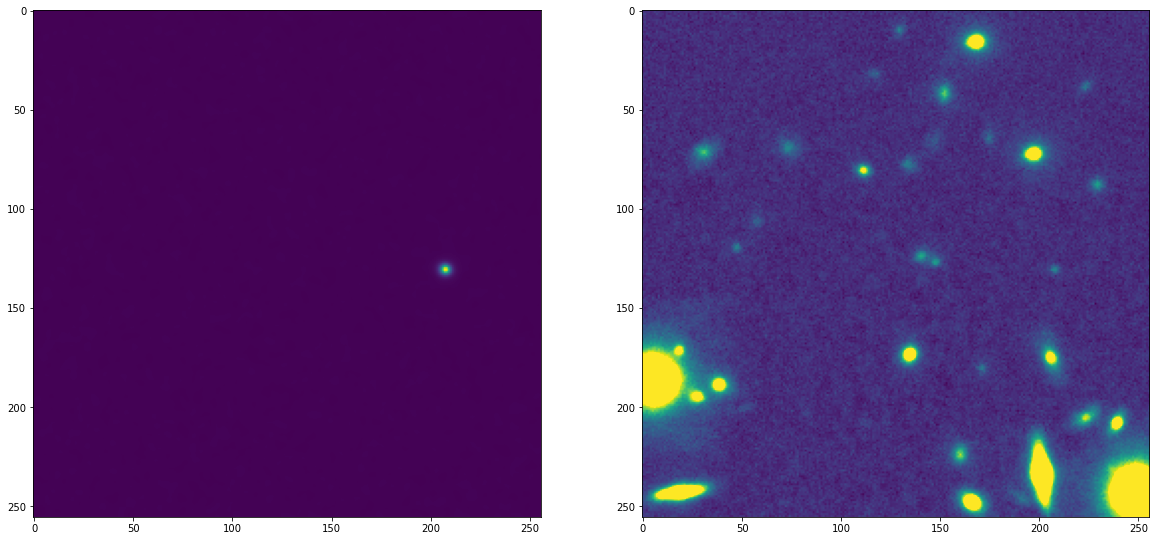

In [40]:
fig, ax = plt.subplots(1,2, figsize =(20,10))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6], vmax = 10000)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


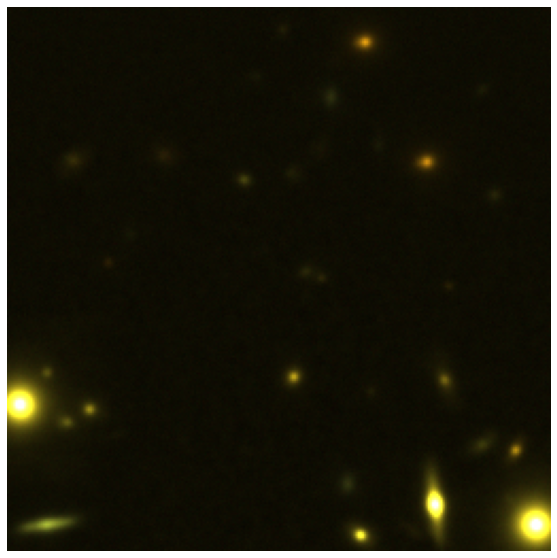

In [41]:
bands = [7,6,5] # Plot ugrizy

fig = plt.figure(figsize = (10,10))

plot.plot_rgb(res[1]/(np.max(res[1][4:])/10), bands = bands,ax= None, band_first = True,zoom = 1, clip = False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


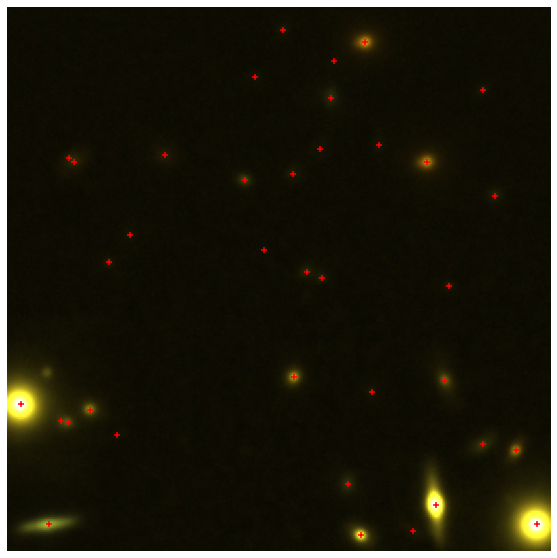

In [42]:
bands = [7,6,5] # Plot ugrizy
pixel_scale_lsst = 0.2 # arcsec/pix
fig = plt.figure(figsize = (10,10))

plot.plot_rgb(res[1]/(np.max(res[1][4:])/10), bands = bands,ax= None, band_first = True,zoom = 1, shifts = res[3]/pixel_scale_lsst, clip = False)